In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the requests library.
import requests

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | warwick
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | zhigansk
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | bogacs
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | bolgatanga
Processing Record 15 of Set 1 | nuuk
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | muisne
Processing Record 18 of Set 1 | laguna
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 21 of Set 1 | cidre

Processing Record 36 of Set 4 | constitucion
Processing Record 37 of Set 4 | laiagam
City not found. Skipping...
Processing Record 38 of Set 4 | gonaives
Processing Record 39 of Set 4 | brae
Processing Record 40 of Set 4 | westport
Processing Record 41 of Set 4 | zholymbet
Processing Record 42 of Set 4 | shelburne
Processing Record 43 of Set 4 | rathdrum
Processing Record 44 of Set 4 | wilmington
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | maxixe
Processing Record 47 of Set 4 | kamenka
Processing Record 48 of Set 4 | karaton
Processing Record 49 of Set 4 | korla
Processing Record 50 of Set 4 | biak
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | coahuayana
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | matamoros
Processing Record 5 of Set 5 | altar
Processing Record 6 of Set 5 | waipawa
Processing Record 7 of Set 5 | tabou
Processing Record 8 of Set 5 | carnarvon
Processi

Processing Record 25 of Set 8 | kodiak
Processing Record 26 of Set 8 | laurel
Processing Record 27 of Set 8 | semnan
Processing Record 28 of Set 8 | shieli
Processing Record 29 of Set 8 | bilibino
Processing Record 30 of Set 8 | cazones
Processing Record 31 of Set 8 | lorengau
Processing Record 32 of Set 8 | birao
Processing Record 33 of Set 8 | cockburn town
Processing Record 34 of Set 8 | anloga
Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | yako
Processing Record 37 of Set 8 | bull savanna
Processing Record 38 of Set 8 | hokitika
Processing Record 39 of Set 8 | skibbereen
Processing Record 40 of Set 8 | vieste
Processing Record 41 of Set 8 | nanlong
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | port augusta
Processing Record 44 of Set 8 | tarko-sale
Processing Record 45 of Set 8 | mandalgovi
Processing Record 46 of Set 8 | nurota
Processing Record 47 of Set 8 | meyungs
City not found. Skipping...
Processing Record 48 of Set 8

Processing Record 15 of Set 12 | bend
Processing Record 16 of Set 12 | cartagena
Processing Record 17 of Set 12 | san patricio
Processing Record 18 of Set 12 | samfya
Processing Record 19 of Set 12 | karamay
City not found. Skipping...
Processing Record 20 of Set 12 | dipkarpaz
City not found. Skipping...
Processing Record 21 of Set 12 | santa maria
Processing Record 22 of Set 12 | shelopugino
Processing Record 23 of Set 12 | bichura
Processing Record 24 of Set 12 | paso de carrasco
Processing Record 25 of Set 12 | kirakira
Processing Record 26 of Set 12 | qasigiannguit
Processing Record 27 of Set 12 | jalu
Processing Record 28 of Set 12 | east wenatchee bench
Processing Record 29 of Set 12 | kobryn
Processing Record 30 of Set 12 | russell
Processing Record 31 of Set 12 | inirida
Processing Record 32 of Set 12 | saint-francois
Processing Record 33 of Set 12 | raga
Processing Record 34 of Set 12 | linxia
Processing Record 35 of Set 12 | majene
Processing Record 36 of Set 12 | clarence t

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Warwick,41.7001,-71.4162,25.00,50,1,10.36,US,2021-03-07 03:39:29
1,Tasiilaq,65.6145,-37.6368,26.60,93,90,21.85,GL,2021-03-07 03:39:29
2,Zhigansk,66.7697,123.3711,-13.18,88,100,12.50,RU,2021-03-07 03:39:29
3,East London,-33.0153,27.9116,66.20,82,20,10.36,ZA,2021-03-07 03:39:29
4,Port Elizabeth,-33.9180,25.5701,68.00,83,0,16.11,ZA,2021-03-07 03:39:30
5,Bogacs,47.9000,20.5333,31.19,88,0,5.35,HU,2021-03-07 03:39:30
6,Hithadhoo,-0.6000,73.0833,82.90,76,10,7.85,MV,2021-03-07 03:39:30
7,Touros,-5.1989,-35.4608,75.20,94,40,4.61,BR,2021-03-07 03:39:31
8,Ushuaia,-54.8000,-68.3000,48.20,43,20,12.66,AR,2021-03-07 03:35:39
9,Torbay,47.6666,-52.7314,30.99,86,90,16.11,CA,2021-03-07 03:39:31


In [9]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Warwick,US,2021-03-07 03:39:29,41.7001,-71.4162,25.00,50,1,10.36
1,Tasiilaq,GL,2021-03-07 03:39:29,65.6145,-37.6368,26.60,93,90,21.85
2,Zhigansk,RU,2021-03-07 03:39:29,66.7697,123.3711,-13.18,88,100,12.50
3,East London,ZA,2021-03-07 03:39:29,-33.0153,27.9116,66.20,82,20,10.36
4,Port Elizabeth,ZA,2021-03-07 03:39:30,-33.9180,25.5701,68.00,83,0,16.11
5,Bogacs,HU,2021-03-07 03:39:30,47.9000,20.5333,31.19,88,0,5.35
6,Hithadhoo,MV,2021-03-07 03:39:30,-0.6000,73.0833,82.90,76,10,7.85
7,Touros,BR,2021-03-07 03:39:31,-5.1989,-35.4608,75.20,94,40,4.61
8,Ushuaia,AR,2021-03-07 03:35:39,-54.8000,-68.3000,48.20,43,20,12.66
9,Torbay,CA,2021-03-07 03:39:31,47.6666,-52.7314,30.99,86,90,16.11


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

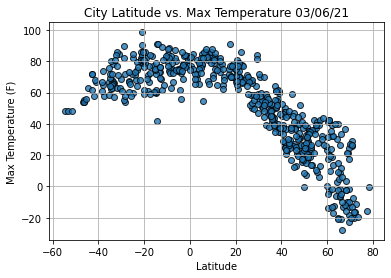

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

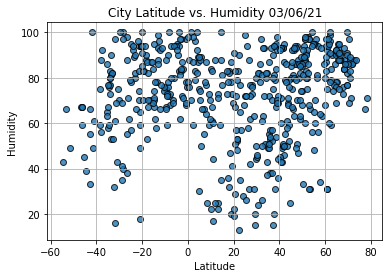

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

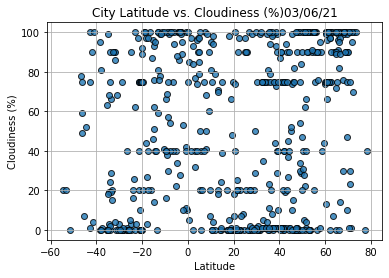

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

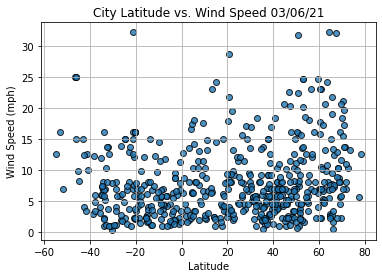

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

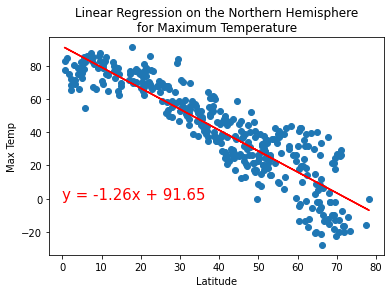

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(0,0))

In [21]:
# Perform r_value for northern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(f"The r-value for northern hemisphere is: {r_value:.3f}")

The r-value for northern hemisphere is: -0.891


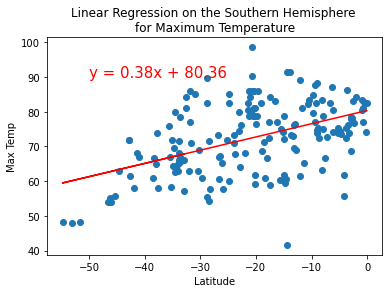

In [55]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

In [23]:
# Perform r_value for southern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(f"The r-value for southern hemisphereis: {r_value:.3f}")

The r-value for southern hemisphereis: 0.484


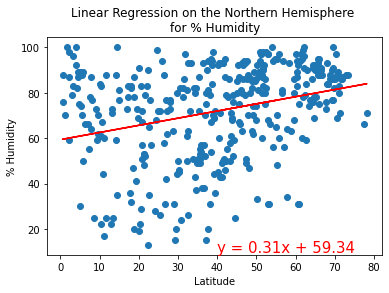

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

In [25]:
# Perform r_value for northern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
print(f"The r-value for northern hemisphere is: {r_value:.3f}")

The r-value for northern hemisphere is: 0.296


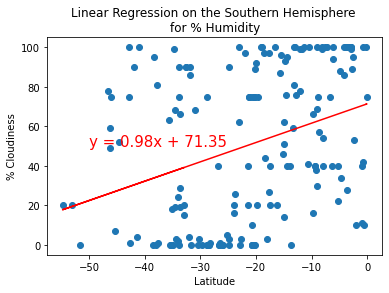

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Cloudiness',(-50,50))

In [27]:
# Perform r_value for southern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print(f"The r-value for southern hemisphereis: {r_value:.3f}")

The r-value for southern hemisphereis: 0.392


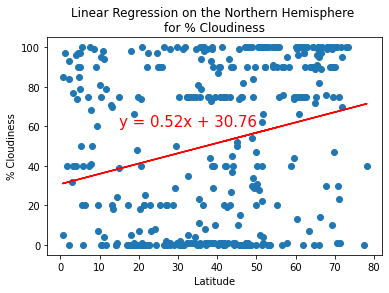

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(15,60))

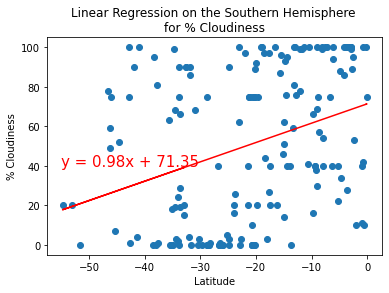

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,40))

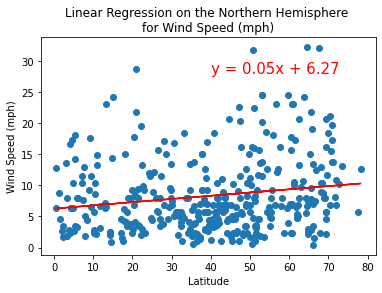

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed (mph)', 'Wind Speed (mph)',(40,28))

In [31]:
# Perform r_value for Northern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print(f"The r-value for Northern hemisphereis: {r_value:.3f}")

The r-value for Northern hemisphereis: -0.323


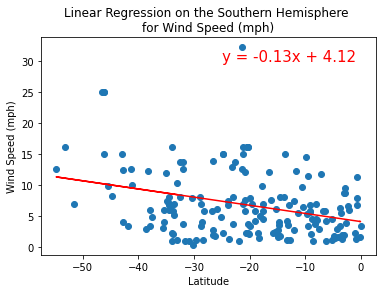

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed (mph)', 'Wind Speed (mph)',(-25,30))

In [34]:
# Perform r_value for Southern hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print(f"The r-value for Southern hemisphereis: {r_value:.3f}")

The r-value for Southern hemisphereis: -0.323
